<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/bert_local_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

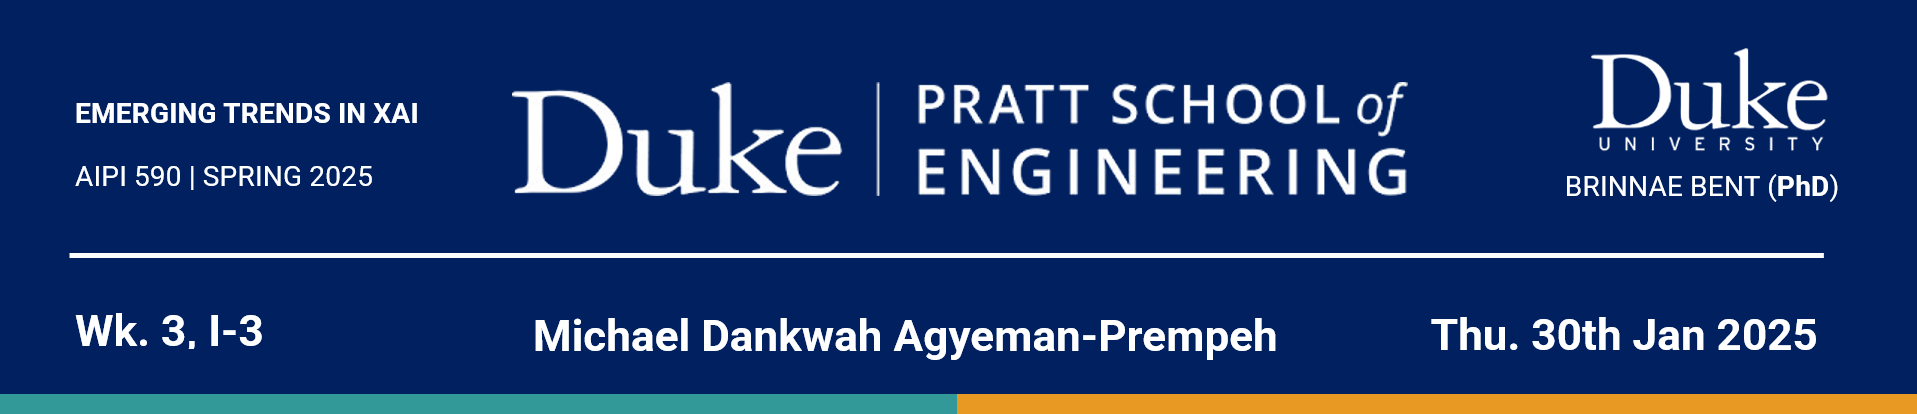
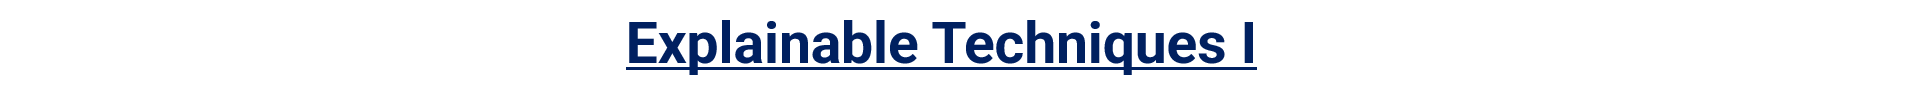

>#### 🔗 **1. GitHub Links:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-3_et1/blob/main/notebooks/bert_local_interpretability_v3.ipynb) to access the *GitHub repository ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *To utilize SHAP to identify and visualize the influence of specific words and phrases within paragraph-length text on GPT-2's generation of biased or unbiased outputs related to gender. This analysis will help us understand and potentially mitigate gender biases present in the model's learned representations and generated text.*

<br>

---

<br>

- ### **Why GPT-2 as model of choice for text prediction and not BERT for example:**
Text goes here

--------------------------------------------------------------------------------

In [38]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [39]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "aipi590_i-3_et1"
# git_path = 'https://github.com/theorignalmapdcodex/aipi590_i-3_et1.git' # Change to your path
# !git clone "{git_path}"

# # Change working directory to location of notebook
# notebook_dir = 'notebooks'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

## 📚 **I. Libraries & Packages Installation**

In [40]:
!pip install transformers shap

In [41]:
#1 Importing for usage of SHAP and GPT-2
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import numpy as np
import shap

## ⚙️ **III. Setting Up Functions to Predict/Score and Visuialize**

## 💻 **IV. Initializing GPT-2 and setting up process required to tokenize text**

In [42]:
# Load pre-trained BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [43]:
# Setting model decoder to true
model.config.is_decoder = True
# Setting text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2,
}

In [44]:
firsttext_to_analyse = ["A doctor was examining a patient with the help of a nurse when."]
secondtext_to_analyse = ["The CEO, accompanied by his female assistant, after giving a speech."]

## ✨ **V. Trying to Analyze Gender Bias in Career Descriptions of GPT-2 model with SHAP values**

> ### **a. i.) <mark>Viz #1</mark>: ----**

In [45]:
explainer = shap.Explainer(model, tokenizer)
viz1gen_shap_values = explainer(firsttext_to_analyse)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:27, 27.05s/it]               


In [46]:
shap.plots.text(viz1gen_shap_values)

In [47]:
print(viz1gen_shap_values)

.values =
array([[[-3.04454307e-01,  2.44731252e-01,  2.66324890e-01,
         -1.10453336e-02, -8.37144171e-02, -6.90299764e-02,
         -2.43182238e-02, -3.00772718e-02,  3.86539559e-01,
          1.62857389e-01,  1.82002042e-01, -4.50779226e-01,
         -6.63894062e-02,  2.48346443e-01,  1.58966072e-01,
          4.01110048e-01,  4.99084093e-02, -5.77162821e-02,
         -8.74596490e-02, -6.23864449e-02],
        [ 3.19776112e-01,  3.02052229e-01,  4.32227592e-01,
          5.41194030e-02,  4.84900062e-02,  3.47467857e-02,
         -1.99396393e-02,  3.84144884e-03,  2.15859905e+00,
          5.49358562e-01,  8.65748288e-01, -5.22055171e-02,
         -9.73040518e-02,  6.13336155e-02, -2.46634446e-02,
          1.75307491e-01,  2.40883192e-02,  1.52347456e-01,
         -3.70486735e-02,  4.59904224e-02],
        [-3.04648865e-02,  2.36322279e-01,  4.31881943e-01,
         -6.32242467e-05, -2.20913388e-01,  1.12973752e-01,
          1.51145892e-01,  8.87225090e-02,  6.61599985e-01,
  

> ### **a. ii.) Interpretation of <mark>Viz #1</mark>**
Text goes here

---

> ### **b. i.) <mark>Viz #2</mark>: ----**

In [48]:
explainer = shap.Explainer(model, tokenizer)
viz2gen_shap_values = explainer(secondtext_to_analyse)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/72 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:18, 18.02s/it]               


In [49]:
print(viz2gen_shap_values)

.values =
array([[[-6.81738676e-01,  2.34586108e-01,  5.44946750e-01,
          8.13443077e-02,  2.05258488e-01,  8.12124728e-02,
         -5.94347346e-01,  6.33871173e-02,  5.79431524e-01,
          3.55806495e-02,  2.24101984e-01,  1.37185157e-01,
         -2.17742563e-01, -1.10207139e-01, -6.70574848e-02,
          1.47986753e-01,  5.17480171e-02, -4.48157570e-02,
          4.50162245e-02,  7.28900408e-02],
        [ 2.46872423e-01,  9.97097214e-02, -1.84565790e-01,
          2.69527206e-02,  2.40314725e-02, -4.29309623e-02,
         -4.35300287e-01, -5.79046609e-01, -3.13830306e-01,
         -2.23986808e-01,  9.31273281e-02, -2.26004776e-01,
         -1.91262065e-01, -1.62735078e-02,  3.65844981e-02,
         -2.56136748e-01, -1.75604266e-02, -2.16686566e-01,
          1.87347418e-01, -6.21578778e-02],
        [ 1.43915433e-01,  7.41982444e-01,  5.40331839e-01,
          2.54258273e-01,  5.61702301e-01,  6.37589135e-01,
         -3.15141611e-01, -2.73059219e-02,  4.53930229e-01,
  

In [50]:
shap.plots.text(viz2gen_shap_values)

> ### **b. ii.) Interpretation of <mark>Viz #2</mark>**
Text goes here

---

## ❓ **Why SHAP over LIME and Anchor:**
## *Strengths:*

#### Text goes here

<br>



<br>

## *Limitations:*

#### Text goes here

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**
## *Way Forward and What Can be Done to Improve Approach:*

#### Text goes here

